This file will be used for testing,and playing around with the graph side of thigs

<h2> Imports </h2>

In [1]:
import datautilities
from datetime import datetime

In [2]:
import importlib

importlib.reload(datautilities)

<module 'datautilities' from '/workspaces/MMAMath/datautilities.py'>

First let's add a couple of fights and fighters so we can play around with our graph


In [3]:
datautilities.AddFight("Charles Oliveira", "Justin Gaethje", "2025-05-7","SUB")
datautilities.AddFight("Dustin Poirier","Max Holloway", "2019-04-13","UDEC")
datautilities.AddFight("Charles Oliveira", "Michael Chandler", "2021-05-15","KO/TKO")
datautilities.AddFight("Alexander Volkanovski","Max Holloway", "2020-07-11","UDEC")
datautilities.AddFight("Justin Gaethje","Dustin Poirier", "2022-07-29","KO/TKO")
datautilities.AddFight("Charles Oliveira", "Dustin Poirier", "2021-12-11","SUB")
datautilities.AddFight("Justin Gaethje", "Michael Chandler", "2021-05-15","UDEC")
datautilities.AddFight("Dustin Poirier","Justin Gaethje" , "2018-04-14","KO/TKO")
datautilities.AddFight("Alexander Volkanovski","Max Holloway", "2022-07-02","UDEC")
datautilities.AddFight("Max Holloway", "Dustin Gaethje", "2024-04-13","KO/TKO")
datautilities.AddFight("Paddy Pimblett", "Michael Chandler", "2025-04-12","SUB")
datautilities.AddFight("Ilia Topuria", "Alexander Volkanovski", "2024-02-17", "KO/TKO")
datautilities.AddFight("Ilia Topuria", "Max Holloway", "2024-10-26", "KO/TKO")

Fight already exists: Charles Oliveira vs Justin Gaethje on 2025-05-7
Fight already exists: Dustin Poirier vs Max Holloway on 2019-04-13
Fight already exists: Charles Oliveira vs Michael Chandler on 2021-05-15
Fight already exists: Alexander Volkanovski vs Max Holloway on 2020-07-11
Fight already exists: Justin Gaethje vs Dustin Poirier on 2022-07-29
Fight already exists: Charles Oliveira vs Dustin Poirier on 2021-12-11
Fight already exists: Justin Gaethje vs Michael Chandler on 2021-05-15
Fight already exists: Dustin Poirier vs Justin Gaethje on 2018-04-14
Fight already exists: Alexander Volkanovski vs Max Holloway on 2022-07-02
Fight already exists: Max Holloway vs Dustin Gaethje on 2024-04-13
Fight already exists: Paddy Pimblett vs Michael Chandler on 2025-04-12
Fight already exists: Ilia Topuria vs Alexander Volkanovski on 2024-02-17
Fight already exists: Ilia Topuria vs Max Holloway on 2024-10-26


<h1> Create Graph </h1>

In [4]:
import networkx as nx

G = nx.Graph()

In [5]:
#Add all fighters to graph
for fighter in datautilities.get_all_fighter_names():
    G.add_node(fighter)

In [6]:
# Add all fights to graph
for fight_id, fight_data in datautilities.load_fights().items():
    winner = fight_data["winner"]
    loser = fight_data["loser"]
    date = fight_data["date"]
    result = fight_data["result"]

    print("Adding edge: winner:" + winner + " loser: " + loser + " result: " +  datautilities.get_result_from_dict(result) + " date: " + date )

    G.add_edge(winner, loser,winner = winner, loser = loser, date=date, result=result)


Adding edge: winner:Charles Oliveira loser: Justin Gaethje result: SUB date: 2025-05-7
Adding edge: winner:Dustin Poirier loser: Max Holloway result: UDEC date: 2019-04-13
Adding edge: winner:Charles Oliveira loser: Michael Chandler result: KO/TKO date: 2021-05-15
Adding edge: winner:Alexander Volkanovski loser: Max Holloway result: UDEC date: 2020-07-11
Adding edge: winner:Justin Gaethje loser: Dustin Poirier result: KO/TKO date: 2022-07-29
Adding edge: winner:Charles Oliveira loser: Dustin Poirier result: SUB date: 2021-12-11
Adding edge: winner:Justin Gaethje loser: Michael Chandler result: UDEC date: 2021-05-15
Adding edge: winner:Dustin Poirier loser: Justin Gaethje result: KO/TKO date: 2018-04-14
Adding edge: winner:Alexander Volkanovski loser: Max Holloway result: UDEC date: 2022-07-02
Adding edge: winner:Max Holloway loser: Dustin Gaethje result: KO/TKO date: 2024-04-13
Adding edge: winner:Paddy Pimblett loser: Michael Chandler result: SUB date: 2025-04-12
Adding edge: winner:I

In [7]:
#Quickly print graph
print("Fighters")
for node, data in G.nodes(data=True):
    print(f"Fighter: {node}, Data: {data}")

print(" #---# ")

print("Fights")
for u, v, data in G.edges(data=True):
    print(f"Fight: {u} -> {v}, Info: {data}")


Fighters
Fighter: Charles Oliveira, Data: {}
Fighter: Justin Gaethje, Data: {}
Fighter: Dustin Poirier, Data: {}
Fighter: Max Holloway, Data: {}
Fighter: Michael Chandler, Data: {}
Fighter: Alexander Volkanovski, Data: {}
Fighter: Dustin Gaethje, Data: {}
Fighter: Paddy Pimblett, Data: {}
Fighter: Ilia Topuria, Data: {}
 #---# 
Fights
Fight: Charles Oliveira -> Justin Gaethje, Info: {'winner': 'Charles Oliveira', 'loser': 'Justin Gaethje', 'date': '2025-05-7', 'result': {'KO/TKO': 0, 'SUB': 1, 'UDEC': 0, 'SDEC': 0, 'MDEC': 0, 'Draw': 0}}
Fight: Charles Oliveira -> Michael Chandler, Info: {'winner': 'Charles Oliveira', 'loser': 'Michael Chandler', 'date': '2021-05-15', 'result': {'KO/TKO': 1, 'SUB': 0, 'UDEC': 0, 'SDEC': 0, 'MDEC': 0, 'Draw': 0}}
Fight: Charles Oliveira -> Dustin Poirier, Info: {'winner': 'Charles Oliveira', 'loser': 'Dustin Poirier', 'date': '2021-12-11', 'result': {'KO/TKO': 0, 'SUB': 1, 'UDEC': 0, 'SDEC': 0, 'MDEC': 0, 'Draw': 0}}
Fight: Justin Gaethje -> Dustin Poir

<h3> Built In Traversals </h3>

In [8]:
# Find paths from Volk to Oliveria
VolkGaethjePaths =list(nx.all_simple_paths(G,source="Alexander Volkanovski", target="Justin Gaethje"))

print("Paths from Alexander Volkanovski to Dustin Gaethje:")
for path in VolkGaethjePaths:
    print(" -> ".join(path))

Paths from Alexander Volkanovski to Dustin Gaethje:
Alexander Volkanovski -> Max Holloway -> Dustin Poirier -> Justin Gaethje
Alexander Volkanovski -> Max Holloway -> Dustin Poirier -> Charles Oliveira -> Justin Gaethje
Alexander Volkanovski -> Max Holloway -> Dustin Poirier -> Charles Oliveira -> Michael Chandler -> Justin Gaethje
Alexander Volkanovski -> Ilia Topuria -> Max Holloway -> Dustin Poirier -> Justin Gaethje
Alexander Volkanovski -> Ilia Topuria -> Max Holloway -> Dustin Poirier -> Charles Oliveira -> Justin Gaethje
Alexander Volkanovski -> Ilia Topuria -> Max Holloway -> Dustin Poirier -> Charles Oliveira -> Michael Chandler -> Justin Gaethje


<h3> Custom Traversals </h3>

In [9]:
# Time Bound Traversal, all fights have to be before certain date
def DFS_BeforeDate(Graph, source, target, cutoff_date_str):
    cutoff_date = datetime.strptime(cutoff_date_str, "%Y-%m-%d").date()
    all_paths = []

    def dfs(current, path):
        if current == target:
            all_paths.append(list(path))
            return
        
        for neighbor in Graph.neighbors(current):
            visited_nodes = {path[0]} | {step[0] for step in path[1:]}
            if neighbor in visited_nodes:
                continue  # avoid cycles

            edge_data = Graph.get_edge_data(current, neighbor)
            edge_date = datetime.strptime(edge_data.get("date"), "%Y-%m-%d").date()
            edge_result = datautilities.get_result_from_dict(edge_data.get("result"))

            WL_fromperspective = "W"
            fight_winner = edge_data.get("winner")
  
            if(neighbor == fight_winner):
                WL_fromperspective = "L"
            
            if(edge_result == "Draw"):
                WL_fromperspective = "D"

            # Check if the edge date is before or equal to the cutoff date            
            if edge_date <= cutoff_date:
                path.append((neighbor,date,edge_result, WL_fromperspective))
                #print(f"Current Node: : {current}  '{WL_fromperspective}', Opponent: {neighbor}, Method: {edge_result}, Date: {edge_date}")
                dfs(neighbor, path)
                path.pop()

    dfs(source, [source])
    return all_paths

In [10]:
def PrintCustomPaths(paths):
    for path in paths:
        output = []
        for i in range(len(path) - 1):
            from_node = path[i][0] if i > 0 else path[0]  # string for the first fighter
            to_node, date, result, WL= path[i + 1]           # tuple
            segment = f"{from_node} --{result} {WL} --> {to_node}. {date}"
            output.append(segment)
        print(" | ".join(output))

In [11]:
VolkGaethjePathsBefore2026 = DFS_BeforeDate(G, "Alexander Volkanovski", "Justin Gaethje", "2026-09-01")
print("Paths from Alexander Volkanovski to Justin Gaethje before 2026-01-01:")
PrintCustomPaths(VolkGaethjePathsBefore2026)

Paths from Alexander Volkanovski to Justin Gaethje before 2026-01-01:
Alexander Volkanovski --UDEC W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin Poirier. 2024-10-26 | Dustin Poirier --KO/TKO W --> Justin Gaethje. 2024-10-26
Alexander Volkanovski --UDEC W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin Poirier. 2024-10-26 | Dustin Poirier --SUB L --> Charles Oliveira. 2024-10-26 | Charles Oliveira --SUB W --> Justin Gaethje. 2024-10-26
Alexander Volkanovski --UDEC W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin Poirier. 2024-10-26 | Dustin Poirier --SUB L --> Charles Oliveira. 2024-10-26 | Charles Oliveira --KO/TKO W --> Michael Chandler. 2024-10-26 | Michael Chandler --UDEC L --> Justin Gaethje. 2024-10-26
Alexander Volkanovski --KO/TKO L --> Ilia Topuria. 2024-10-26 | Ilia Topuria --KO/TKO W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin Poirier. 2024-10-26 | Dustin Poirier --KO/TKO W --> Justin Gaethje. 2024-10-26

<h2> Build Trees from Paths </h2>

For example, instead of 

    a->b->c
    a->b->d

We will want

    a->b
       b->c
       b->d

This will help visualize and better understand relationships

In [12]:
def AddFightToTree(Tree, father, opponent, fightdate, fightresult, fightWL):
    if father not in Tree:
        Tree[father] = []
    #print(f"Adding fight: father: {father}, opponent: {opponent}, date: {fightdate}, result: {fightresult}, WL: {fightWL}")
    if (opponent, fightdate, fightresult, fightWL) in Tree[father]:
        return
    Tree[father].append((opponent,fightdate, fightresult, fightWL))


def BuildTreesFromPaths(paths):
    Trees = {}

    for path in paths:

        print("path:", path)

        for index in range(len(path)):
            if index == 0:
                continue

            fight = path[index]

            father = path[index - 1][0]
            if index == 1:
                father = path[index-1]
            currFighter = fight[0]
            fightdate = fight[1]
            fightresult = fight[2]
            fightWL = fight[3]
            
            AddFightToTree(Trees, father, currFighter, fightdate, fightresult, fightWL)

            
    return Trees



In [13]:
VolkGaethje2026Trees = BuildTreesFromPaths(VolkGaethjePathsBefore2026)

path: ['Alexander Volkanovski', ('Max Holloway', '2024-10-26', 'UDEC', 'W'), ('Dustin Poirier', '2024-10-26', 'UDEC', 'L'), ('Justin Gaethje', '2024-10-26', 'KO/TKO', 'W')]
path: ['Alexander Volkanovski', ('Max Holloway', '2024-10-26', 'UDEC', 'W'), ('Dustin Poirier', '2024-10-26', 'UDEC', 'L'), ('Charles Oliveira', '2024-10-26', 'SUB', 'L'), ('Justin Gaethje', '2024-10-26', 'SUB', 'W')]
path: ['Alexander Volkanovski', ('Max Holloway', '2024-10-26', 'UDEC', 'W'), ('Dustin Poirier', '2024-10-26', 'UDEC', 'L'), ('Charles Oliveira', '2024-10-26', 'SUB', 'L'), ('Michael Chandler', '2024-10-26', 'KO/TKO', 'W'), ('Justin Gaethje', '2024-10-26', 'UDEC', 'L')]
path: ['Alexander Volkanovski', ('Ilia Topuria', '2024-10-26', 'KO/TKO', 'L'), ('Max Holloway', '2024-10-26', 'KO/TKO', 'W'), ('Dustin Poirier', '2024-10-26', 'UDEC', 'L'), ('Justin Gaethje', '2024-10-26', 'KO/TKO', 'W')]
path: ['Alexander Volkanovski', ('Ilia Topuria', '2024-10-26', 'KO/TKO', 'L'), ('Max Holloway', '2024-10-26', 'KO/TKO

In [17]:
print(VolkGaethje2026Trees)

{'Alexander Volkanovski': [('Max Holloway', '2024-10-26', 'UDEC', 'W'), ('Ilia Topuria', '2024-10-26', 'KO/TKO', 'L')], 'Max Holloway': [('Dustin Poirier', '2024-10-26', 'UDEC', 'L')], 'Dustin Poirier': [('Justin Gaethje', '2024-10-26', 'KO/TKO', 'W'), ('Charles Oliveira', '2024-10-26', 'SUB', 'L')], 'Charles Oliveira': [('Justin Gaethje', '2024-10-26', 'SUB', 'W'), ('Michael Chandler', '2024-10-26', 'KO/TKO', 'W')], 'Michael Chandler': [('Justin Gaethje', '2024-10-26', 'UDEC', 'L')], 'Ilia Topuria': [('Max Holloway', '2024-10-26', 'KO/TKO', 'W')]}


<h2> Visualize Trees </h2>

In [28]:
from graphviz import Digraph

dot = Digraph(comment='Fighter Paths')
dot.attr(rankdir='TB')



In [107]:
from IPython.display import display, SVG

def CreateVisualTreeFromTrees(Trees, rootFighter, targetFighter):
    
    dot = Digraph(comment='MMA Tree' + rootFighter + " to " + targetFighter)
    dot.attr(rankdir='TB')

    #Add node for target
    dot.node(targetFighter, label=targetFighter, shape="doublecircle", penwidth="2")

    # Add node for each fighter in the tree
    for fighter in Trees:
        shape = "circle"
        color = "black"
        penwidth = "1"
        width = height = "0.5"
        
        if(fighter == rootFighter):
            shape = "doublecircle"
            color = "black"
            penwidth = "3"
            width = height = "1"
        
        dot.node(fighter, label=fighter, shape=shape,color=color,penwidth=penwidth,width=width,height=height)

        # Add edges for each fight
        for fight in Trees[fighter]:
            opponent, date, result, WL = fight

            if WL == "W":
                edge_color = "green"
            elif WL == "L":
                edge_color = "red"
            elif WL == "D":
                edge_color = "yellow"

            edge_label = f"{result}\n{date}"
            dot.edge(fighter, opponent, label=edge_label,color=edge_color,fontsize='10',labeldistance='5')

    # To render in Jupyter without saving to file, display the SVG directly
    SVG(dot.pipe(format='svg'))
  
    #TODO add boolean option to save to file

    return dot


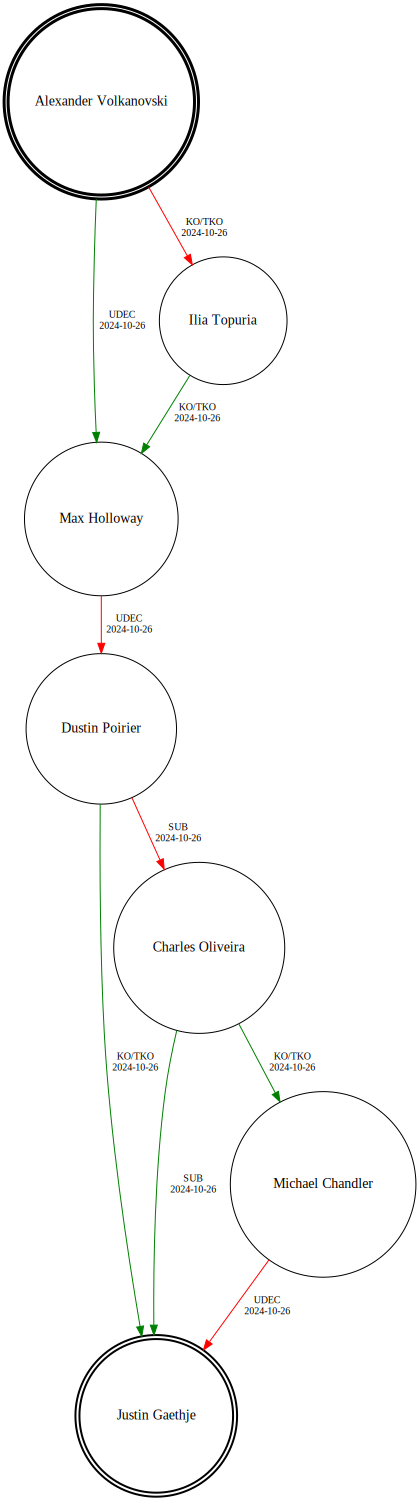

In [108]:
CreateVisualTreeFromTrees(VolkGaethje2026Trees, "Alexander Volkanovski", "Justin Gaethje")

In [88]:
def RunWholeAnalysis(rootFighter, targetFighter, cutoff_date_str):
    paths = DFS_BeforeDate(G, rootFighter, targetFighter, cutoff_date_str)
    print(f"Found {len(paths)} paths from {rootFighter} to {targetFighter} before {cutoff_date_str}:")
    PrintCustomPaths(paths)
    trees = BuildTreesFromPaths(paths)
    print("Trees")
    print(trees)
    dot = CreateVisualTreeFromTrees(trees, rootFighter, targetFighter)
    return dot

Found 8 paths from Ilia Topuria to Paddy Pimblett before 2026-01-01:
Ilia Topuria --KO/TKO W --> Alexander Volkanovski. 2024-10-26 | Alexander Volkanovski --UDEC W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin Poirier. 2024-10-26 | Dustin Poirier --KO/TKO W --> Justin Gaethje. 2024-10-26 | Justin Gaethje --SUB L --> Charles Oliveira. 2024-10-26 | Charles Oliveira --KO/TKO W --> Michael Chandler. 2024-10-26 | Michael Chandler --SUB L --> Paddy Pimblett. 2024-10-26
Ilia Topuria --KO/TKO W --> Alexander Volkanovski. 2024-10-26 | Alexander Volkanovski --UDEC W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin Poirier. 2024-10-26 | Dustin Poirier --KO/TKO W --> Justin Gaethje. 2024-10-26 | Justin Gaethje --UDEC W --> Michael Chandler. 2024-10-26 | Michael Chandler --SUB L --> Paddy Pimblett. 2024-10-26
Ilia Topuria --KO/TKO W --> Alexander Volkanovski. 2024-10-26 | Alexander Volkanovski --UDEC W --> Max Holloway. 2024-10-26 | Max Holloway --UDEC L --> Dustin 

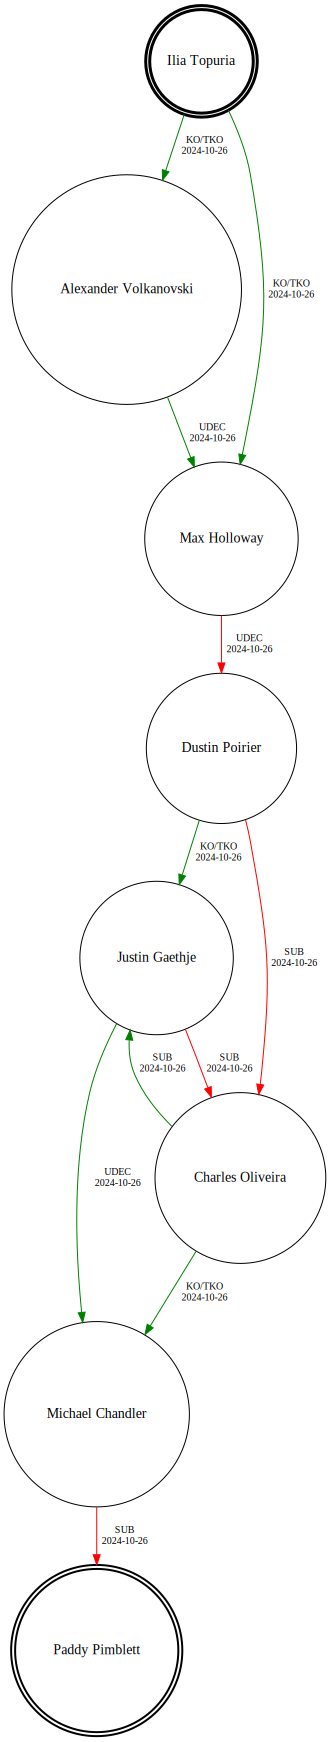

In [90]:
RunWholeAnalysis("Ilia Topuria", "Paddy Pimblett", "2026-01-01")

<H2> Start scoring fights and paths </h2>